In [37]:
import pandas as pd

In [10]:
df=pd.read_csv('./서울시 코로나19 확진자 현황.csv')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8300\431493623.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('./서울시 코로나19 확진자 현황.csv')


In [11]:
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      99550 non-null  int64  
 1   확진일     99550 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      99550 non-null  object 
 6   여행력     1717 non-null   object 
 7   접촉력     99550 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      99550 non-null  object 
 10  이동경로    10000 non-null  object 
 11  등록일     99550 non-null  object 
 12  수정일     99550 non-null  object 
 13  노출여부    99550 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 10.6+ MB


# 데이터 확인 및 전처리

In [13]:
#불필요한 컬럼 삭제
df = df.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','등록일','수정일','노출여부'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      99550 non-null  int64 
 1   확진일     99550 non-null  object
 2   지역      99550 non-null  object
 3   여행력     1717 non-null   object
 4   접촉력     99550 non-null  object
 5   상태      99550 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [24]:
#확진일 --> datetime
df['확진일']=pd.to_datetime(df['확진일'])
df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


In [21]:
# 지역 25개 구
print(len(df['지역'].unique()))
print(df['지역'].nunique()) 
df['지역'].unique()

29
29


array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [26]:
df['지역'] =df['지역'].str.strip()
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [27]:
df['지역'].nunique()

27

In [28]:
df['지역'] = df['지역'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [30]:
#결측치 확인
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

# 구별 확진자 동향
## 확진일 - 구별로 pivot_table 집계

In [33]:
df.pivot_table(index= '확진일',columns = '지역', 
               aggfunc='sum', 
               fill_value=0)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8300\2934550589.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index= '확진일',columns = '지역',


연번                                                        \
지역              강남구      강동구      강북구      강서구      관악구      광진구      구로구   
확진일                                                                         
2020-01-24        0        0        0        1        0        0        0   
2020-01-30        0        0        0        0        0        0        0   
2020-01-31        0        0        0        0        0        0        0   
2020-02-02        0        0        0        0        0        0        0   
2020-02-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-09-24  6105172  5149899  2287682  5808791  6295203  5246892  7625165   
2021-09-25  3565750  3953893  4049314  4624865  3569375  3276869  2989108   
2021-09-26  4179405  1652934  2623631  2823421  3594494  3598449  7002276   
2021-09-27  4896132  2844318  1960950  4906518  2252317  3335312  5688236   
2021-09-28  4448970  5046544  2472674  4060866  4748201  3561677  5453355   

                                       ...                              \
지역              금천구       기타      노원구  ...      성북구       송파구      양천구   
확진일                                    ...                               
2020-01-24        0        0        0  ...        0         0        0   
2020-01-30        0        0        0  ...        0         0        0   
2020-01-31        0        0        0  ...        5         0        0   
2020-02-02        0        0        0  ...        0         0        0   
2020-02-05        0        0        0  ...       10         9        0   
...             ...      ...      ...  ...      ...       ...      ...   
2021-09-24  3146547        0  4959264  ...  4673266  10672797  3238986   
2021-09-25  3761377        0  2602213  ...  2986444   8484401  1930278   
2021-09-26  1848790        0  2435150  ...  2432791   5353760  1166460   
2021-09-27  1568796        0  3633716  ...  5306677   5687963  2646182   
2021-09-28  3067726  6468420  2879552  ...  4066774   6731970  2674242   

                                                                           
지역             영등포구      용산구      은평구      종로구       중구      중랑구      타시도  
확진일                                                                        
2020-01-24        0        0        0        0        0        0        0  
2020-01-30        0        0        0        3        0        2        0  
2020-01-31        0        0        0       13        0        0        0  
2020-02-02        0        0        0        0        0        0        8  
2020-02-05        0        0        0        0        0        0        0  
...             ...      ...      ...      ...      ...      ...      ...  
2021-09-24  4859984  2384039  3524166  1909276  3337506  4194992  4576219  
2021-09-25  3372282  3086278  2988227  2990987  2312845  3374201  2989260  
2021-09-26  3893633  1263164  3700224  3216989  2629844  2522876  3115393  
2021-09-27  4022041  2741590  1665040  1964151  2159021  1761275  6184187  
2021-09-28  4256987  2371664  4657387  2279299  3673102  2567243  4256470  

[582 rows x 27 columns]

In [42]:
df_gu = pd.pivot_table(df, index='확진일', columns='지역',values='연번',aggfunc='count',margins=True)
# df_gu = pd.pivot_tabel(df,'연변','확진일','지역','count')
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [45]:
# 서울시 일별 추가확진자 현황
s_date = df_gu['All'][:-1]

In [47]:
# 서울시 일별 추가확진자 많은 순으로
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

In [48]:
# 서울시 일별 추가 확진자 시각화
from matplotlib import font_manger,rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')

ImportError: cannot import name 'font_manger' from 'matplotlib' (c:\python38\lib\site-packages\matplotlib\__init__.py)

In [54]:
# 서울시 일별 추가 확진자 시각화
from matplotlib import font_manger,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
# 마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

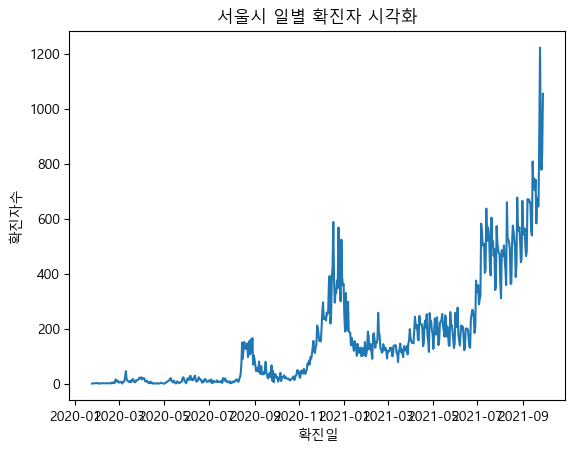

In [55]:
x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.show()

In [56]:
#서울시 구별 누적 확진자 비교
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)

In [57]:
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

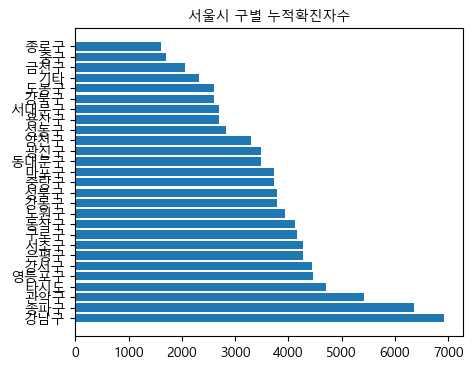

In [63]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('서울시 구별 누적확진자수',size=10)
plt.show()

In [64]:
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [69]:
#최근일(21-09-28)기준 지역별 확진자
s_gu1 = df_gu.iloc[-2][:-1]
s_gu1 = s_gu1.sort_values(ascending=False)

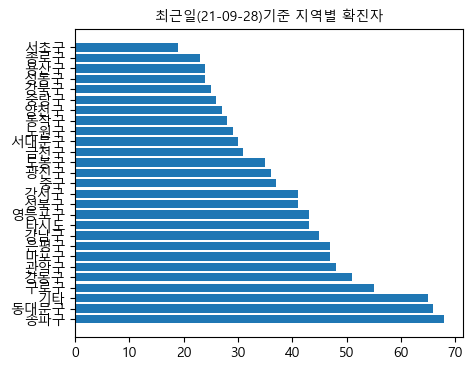

In [79]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu1.index
y = s_gu1.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('최근일(21-09-28)기준 지역별 확진자',size=10)
plt.show()

In [72]:
#접촉력에 따른 확진 분석
#접촉력에 따른 확진 건수 best10
df['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [77]:
# df.info()
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [78]:
# 최근 월(9월) 접촉력에 따른 확진건수 best10
#확진일을 연도 2021 & 9월 ['접촉력'].value_counts()[:10].to_frame

In [115]:
#답
# df[조건]['접촉력'].value_counts()[:10].to_frame
(df['확진일'].dt.year ==2021) & (df['확진일'].dt.month==9)

0         True
1         True
2         True
3         True
4         True
         ...  
99545    False
99546    False
99547    False
99548    False
99549    False
Name: 확진일, Length: 99550, dtype: bool

In [118]:
df((df['확진일'].dt.year ==2021) & (df['확진일'].dt.month==9))['접촉력'].value_counts()[:10].to_frame

TypeError: 'DataFrame' object is not callable

In [117]:
['접촉력'].value_counts()[:10].to_frame

AttributeError: 'list' object has no attribute 'value_counts'